# CS 524

HW7 Sparsh Agarwal 9075905142

Q1.  The optimization problem can be modelled such that all the points are in a circle and we need to find the circle with minimum radius. We take norm of each point from a variable center nd whichever center gives the minimum radius, we choose that center and radius for optimal circle

INFO: Recompiling stale cache file /Users/sparshagarwal/.julia/lib/v0.6/StaticArrays.ji for module StaticArrays.
INFO: Recompiling stale cache file /Users/sparshagarwal/.julia/lib/v0.6/JuMP.ji for module JuMP.
INFO: Recompiling stale cache file /Users/sparshagarwal/.julia/lib/v0.6/Gurobi.ji for module Gurobi.
INFO: Recompiling stale cache file /Users/sparshagarwal/.julia/lib/v0.6/PyPlot.ji for module PyPlot.


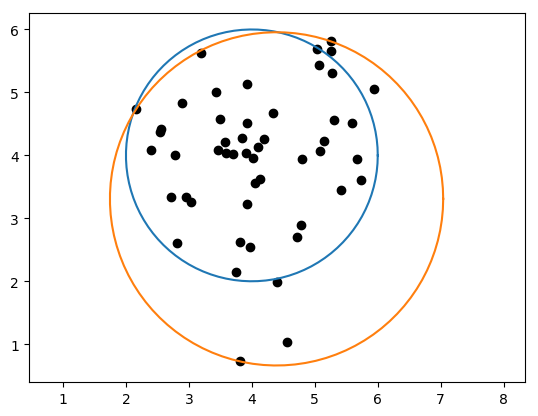

Academic license - for non-commercial use only


(1.48205232890878, 7.304007063427961, 0.3956323855503639, 6.266610915814293)

In [1]:
using JuMP, Gurobi, PyPlot

# println(randn(2,50))
X = 4 + randn(2,50) # generate 50 random points
t = linspace(0,2pi,100) # parameter that traverses the circle
r = 2; x1 = 4; x2 = 4 # radius and coordinates of the center


m = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m, u[1:2])
@variable(m, radius>=0)
@constraint(m, cstr[i in 1:50], norm(X[:,i] - u) <= radius)
@objective(m, Min, radius )
solve(m)

plot( x1 + r*cos.(t), x2 + r*sin.(t)) # plot circle radius r with center (x1,x2)
x1 = getvalue(u[1])
x2 = getvalue(u[2])
r = getvalue(radius)
plot( x1 + r*cos.(t), x2 + r*sin.(t))
scatter( X[1,:], X[2,:], color="black") # plot the 50 points
axis("equal") # make x and y scales equal

Q2. a)

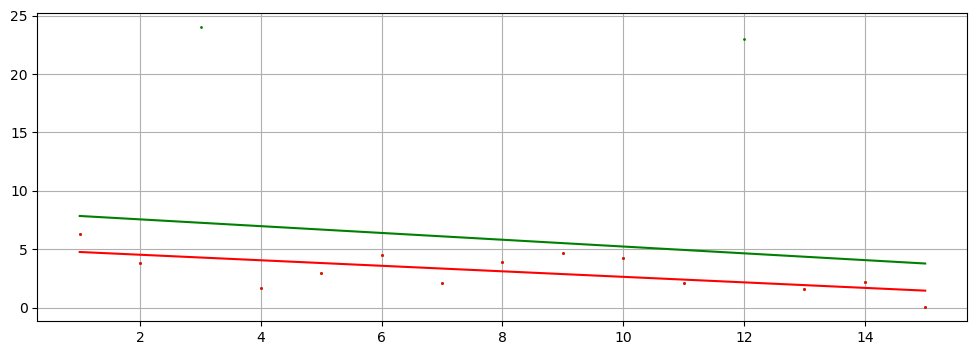

Academic license - for non-commercial use only
Academic license - for non-commercial use only


In [8]:
using JuMP, Gurobi, PyPlot

x = [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15]
y = [6.31 3.78 24 1.71 2.99 4.53 2.11 3.88 4.67 4.25 2.06 23 1.58 2.17 0.02]
x1 = [1 2 4 5 6 7 8 9 10 11 13 14 15]
y1 = [6.31 3.78 1.71 2.99 4.53 2.11 3.88 4.67 4.25 2.06 1.58 2.17 0.02]

k = 1

n = length(x)
A = ones(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j);
    end
end

m = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m, u[1:k+1])
@objective(m, Min, sum( (y' - A*u).^2 ) )

status = solve(m)
uopt = getvalue(u)
# println(y')

n1 = length(x1)
A1 = ones(n1,k+1)
for i = 1:n1
    for j = 1:k+1
        A1[i,j] = x1[i]^(k+1-j);
    end
end

m1 = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m1, u1[1:k+1])
@objective(m1, Min, sum((y1' - A1*u1).^2 ))

status = solve(m1)
u1opt = getvalue(u1)

npts = 100
xfine = linspace(1,15,npts)
ffine = ones(npts)
for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end

yfine = ffine * uopt
y1fine = ffine * u1opt

figure(figsize=(12,4))
plot( x, y, "g.", markersize=2)
plot( x1, y1, "r.", markersize=2)
plot( xfine, yfine, "g-")
plot( xfine, y1fine, "r-")
# axis([0.001,100,-1.5,1.5])

grid()


Q2. b)

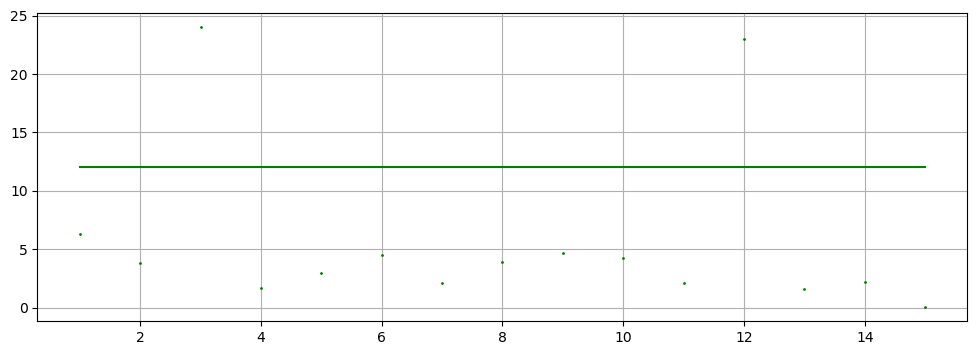

Academic license - for non-commercial use only


In [9]:
using JuMP, Gurobi, PyPlot

x = [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15]
y = [6.31 3.78 24 1.71 2.99 4.53 2.11 3.88 4.67 4.25 2.06 23 1.58 2.17 0.02]

k = 1

n = length(x)
A = ones(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j);
    end
end

m = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m, u[1:k+1])
@variable(m, t[1:n])
@expression(m, yexp, y - u'*A')
@constraint(m, yexp .<= t )
@constraint(m, -yexp .<= t )
@objective(m, Min, sum(t) )

status = solve(m)
uopt = getvalue(u)
# println(y')

npts = 100
xfine = linspace(1,15,npts)
ffine = ones(npts)
for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end

yfine = ffine * uopt

figure(figsize=(12,4))
plot( x, y, "g.", markersize=2)
plot( xfine, yfine, "g-")
# axis([0.001,100,-1.5,1.5])

grid()

Q2. c)

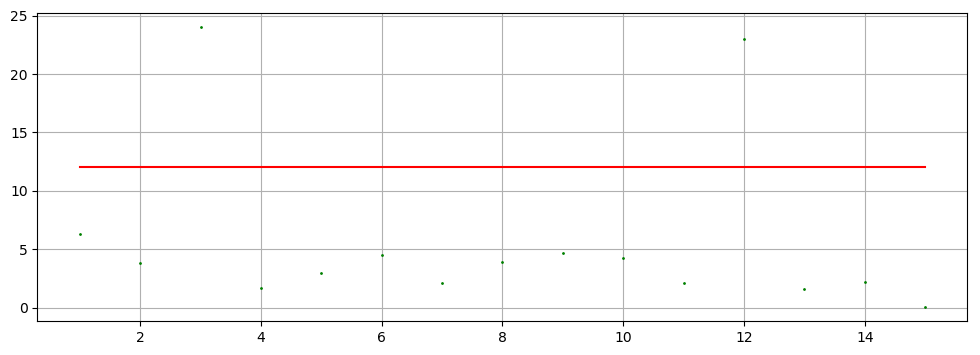

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

In [10]:
using JuMP, Gurobi, PyPlot

x = [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15]
y = [6.31 3.78 24 1.71 2.99 4.53 2.11 3.88 4.67 4.25 2.06 23 1.58 2.17 0.02]

k = 1
M = 1

n = length(x)
A = ones(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x[i]^(k+1-j);
    end
end

npts = 100
xfine = linspace(-3,3,npts)
ffine = ones(npts)
for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end

for ix = 1: npts
    m = Model(solver=GurobiSolver(OutputFlag=0))
    @variable(m, w <= M)
    @variable(m, v >= 0)
    @constraint(m, xfine[ix] <= w+v )
    @constraint(m, -xfine[ix] <= w+v )
    @expression(m, result, w^2 + 2*M*v )
    @objective(m, Min, result )

    solve(m)
    yfine[ix] = getvalue(result)
end


m1 = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m1, u[1:k+1])
@variable(m1, w[1:n] <= 1)
@variable(m1, v[1:n] >= 0)
@expression(m1, expr, y - u'*A')
@expression(m1, finexp, w.^2 + 2*v )
@constraint(m1, expr .<= w+v )
@constraint(m1, -expr .<= w+v )
@objective(m1, Min, sum(finexp) )

solve(m1)
yloss = getvalue(finexp)
uopt = getvalue(u)
xnewfine = linspace(1,15,npts)
fnewfine = ones(npts)
for j = 1:k
    fnewfine = [fnewfine.*xnewfine ones(npts)]
end
ynewfine = fnewfine * uopt

print(length(yloss))
# print(x)
# print(getvalue(w))
# print(getvalue(expr))
# print(getvalue(v))

figure(figsize=(12,4))
plot( x, y, "g.", markersize=2)
# plot( x, finexp, "g.", markersize=2)
# plot( xfine, yfine, "g-")
plot( xnewfine, ynewfine, "r-")
# # axis([0.001,100,-1.5,1.5])
grid()






Q3. a) On last page.

Q3. b)

In [4]:
using JuMP, Mosek, PyPlot

m = Model(solver=MosekSolver(LOG=0))
@variable(m, x)
@variable(m, y)
@variable(m, z)
@NLconstraint(m, log(exp(log(1/500) + x + y - z) + exp(log(1/500) + y) + exp(log(1/500) + y + z)) <= 0)
@constraint(m, z - y <= log(0.1))
@objective(m, Min, -x-2y )

status = solve(m)
println("T = ", exp(getvalue(x)))
println("r = ", exp(getvalue(y)))
println("w = ", exp(getvalue(z)))

T = 23.840213331845
r = 46.390451441171
w = 4.639040228736584
